In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
from sklearn.neighbors import KernelDensity

Reading the data

In [4]:
data = pd.read_csv('../Data/CoCo.csv')
CoCo =  data['yield'].values
CoCo = CoCo.reshape(-1,1)

TopHat Kernel

In [5]:

kde = KernelDensity(kernel='tophat')
kde.fit(CoCo)


KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='tophat', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

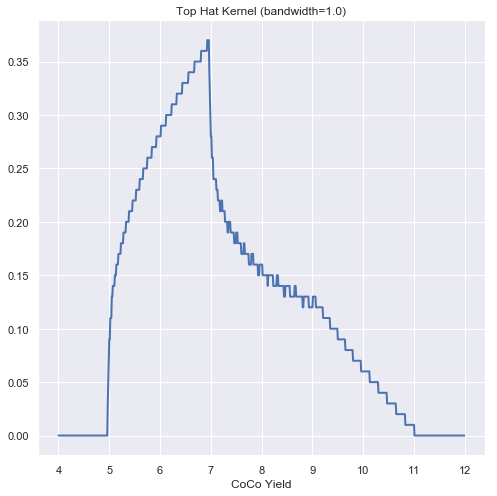

In [6]:
fig = plt.figure(figsize=(8,8))
x= np.arange(4,12,0.01)
x = x.reshape(-1,1)
log_dens = kde.score_samples(x)
log_dens = log_dens.reshape(-1,1)

plt.plot(x, np.exp(log_dens),linewidth=2)
plt.xlabel('CoCo Yield');
plt.title('Top Hat Kernel (bandwidth='+ str(kde.bandwidth)+ ')');

Gaussian Kernel with $\lambda=1$

In [7]:
kde = KernelDensity(kernel='gaussian',bandwidth=1)
kde.fit(CoCo)

KernelDensity(algorithm='auto', atol=0, bandwidth=1, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

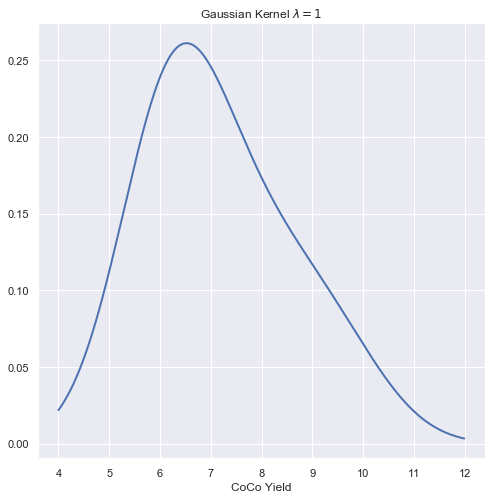

In [8]:
fig = plt.figure(figsize=(8,8))
x= np.arange(4,12,0.01)
x=x.reshape(len(x),1)
log_dens = kde.score_samples(x)
log_dens = log_dens[:,np.newaxis]
plt.plot(x, np.exp(log_dens),linewidth=2);
plt.xlabel('CoCo Yield');
plt.title('Gaussian Kernel $\lambda =1$');

Create kernel density for different bandwidths :
$[1.0,2.0,3.0]$

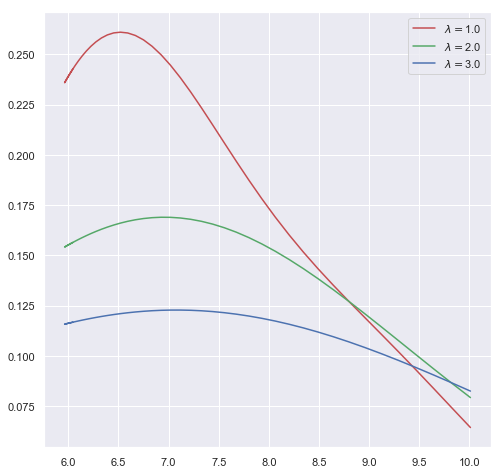

In [9]:
fig = plt.figure(figsize=(8,8))
bw = np.array([1.0,2.0,3.0])
i=0
color = ['r','g','b']
for b in bw:
    kde =KernelDensity(kernel='gaussian',bandwidth=b)
    kde.fit(CoCo)
    plt.plot(CoCo,np.exp(kde.score_samples(CoCo)),color[i],label='$\lambda=$'+str(b))
    i+=1
plt.legend();
    

Finding the probability that yield between 7 and 8.<br>
The kernel can be used as random number generator.

In [10]:
bw = np.array([1,2,3])
for b in bw:
    kde =KernelDensity(kernel='gaussian',bandwidth=b)
    kde.fit(CoCo)
    v=kde.sample(n_samples=1000)
    print('Bandwidth: ' + str(b),' Prob=',sum((v<8)&(v>7))/len(v))

Bandwidth: 1  Prob= [0.205]
Bandwidth: 2  Prob= [0.143]
Bandwidth: 3  Prob= [0.112]


<h3>Finding the optimal bandwidth</h3>

In [11]:
from sklearn.model_selection import GridSearchCV

In [13]:
param = {'bandwidth':np.arange(0.01,3,0.01)}
grid= GridSearchCV(KernelDensity(),param,cv=3)
grid.fit(CoCo)

/Users/jandespiegeleer/.pyenv/versions/3.7.0/envs/my_3.7.0/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18...
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [14]:
grid.best_estimator_.bandwidth

1.73